# pycisTopic analysis

Full dataset, using SCREEN regions.

In [48]:
import pycisTopic
pycisTopic.__version__

'1.0.2.dev0+g6236cef.d20220816'

In [49]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [50]:
import pickle
import pandas as pd

In [51]:
import glob
from collections import OrderedDict
import numpy as np

In [54]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/full_2_cistopic


In [55]:
import os
wdir = '/lustre1/project/stg_00090/scatac_benchmark/full_2_cistopic/'
os.chdir( wdir )

In [56]:
scrub_name_suffix = "0-4"
cto_paths = sorted(glob.glob(f'cistopic_objects/*__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl'))
cistopic_obj_path_dict = {x.split('/')[-1].split(f'__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl')[0]:x for x in cto_paths}
cistopic_obj_path_dict

{'BIO_ddseq_1.FULL': 'cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_2.FULL': 'cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_3.FULL': 'cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_4.FULL': 'cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_1.FULL': 'cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_2.FULL': 'cistopic_objects/BRO_mtscatac_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_1.FULL': 'cistopic_objects/CNA_10xmultiome_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_2.FULL': 'cistopic_objects/CNA_10xmultiome_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_1.FULL': 'cistopic_objects/CNA_10xv11_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_2.FULL': 'cistopic_objects/CNA_10xv11_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_3.FULL': 'cistopic_objects/

In [57]:
mounts = "/lustre1,/staging,/data,/vsc-hard-mounts,/scratch"
sif = "../0_resources/cistopic_image/20220815_pycistopic.sif"
script = "../0_resources/scripts/runModels_lda_mallet.py"

f_mod_dir = 'models__screen__mallet'
if not os.path.exists(os.path.join(wdir, f_mod_dir)):
    os.makedirs(os.path.join(wdir, f_mod_dir))

n_topics_str = "2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30"
n_topics = 30

ver=n_topics_str[-2] + n_topics_str[-1]

n_cores = 36
n_iter = "400"
for sample in cistopic_obj_path_dict.keys():
    infile = cistopic_obj_path_dict[sample]
    outfile = os.path.join(f_mod_dir, sample + '__models_' + str(n_iter) + '_iter.pkl')
    
    intermediate_dir = f"{f_mod_dir}/model_intermediates/{sample}_model_intermediates/"
        
    if not os.path.exists(outfile):
        if not os.path.exists(os.path.join(wdir, intermediate_dir)):
            os.makedirs(os.path.join(wdir, intermediate_dir))
        else:
            print(f'{intermediate_dir} already exists!')
            
        n_topics_detected = len(os.listdir(os.path.join(wdir, intermediate_dir)))
        if not n_topics_detected == n_topics:
            model_tmp_dir = f"{f_mod_dir}/model_tmp/{sample}_model_tmp/"
            if not os.path.exists(os.path.join(wdir, model_tmp_dir)):
                os.makedirs(os.path.join(wdir, model_tmp_dir))

            n_topics_todo = str([x+1 for x in list(range(n_topics_detected,n_topics))]).replace(' ','').replace('[','').replace(']','')

            out_log = f"{f_mod_dir}/{sample}.models_out_log{ver}.txt"
            cmd = f"echo {sample} && cd {wdir} && singularity exec -B {mounts} {sif} python {script} -i {infile} -o {outfile} -nt {n_topics_todo} -c {n_cores} -it {n_iter} -a 50 -abt True -e 0.1 -ebt False -sp {intermediate_dir} -s 555 -td {model_tmp_dir} > {out_log}"

            print(cmd)
            sh_path = f"{f_mod_dir}/{sample}.runmodels{ver}.sh"
            with open(sh_path, 'w') as file:
                file.write(cmd)

    else:
        print(f'{outfile} already exists!')
    
    print('\n')

models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates/ already exists!
echo BIO_ddseq_1.FULL && cd /lustre1/project/stg_00090/scatac_benchmark/full_2_cistopic/ && singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch ../0_resources/cistopic_image/20220815_pycistopic.sif python ../0_resources/scripts/runModels_lda_mallet.py -i cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl -o models__screen__mallet/BIO_ddseq_1.FULL__models_400_iter.pkl -nt 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30 -c 36 -it 400 -a 50 -abt True -e 0.1 -ebt False -sp models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates/ -s 555 -td models__screen__mallet/model_tmp/BIO_ddseq_1.FULL_model_tmp/ > models__screen__mallet/BIO_ddseq_1.FULL.models_out_log30.txt


models__screen__mallet/model_intermediates/BIO_ddseq_2.FULL_model_intermediates/ already exists!
echo BIO_ddseq_2.FULL && cd /lustre1/project/s

In shell:

In [58]:
for script in models__screen__mallet/*30.sh
do
    echo $script
    qsub $script -A lp_symbiosys -l nodes=1:ppn=36 -l walltime=24:00:00 -l pmem=2gb
done

SyntaxError: invalid syntax (1944146239.py, line 1)

Then, combine the models:

In [59]:
intermediate_dict = {x.split('/')[-1].split('_model_intermediates')[0]: x for x in sorted(glob.glob(f'{f_mod_dir}/model_intermediates/*'))}
intermediate_dict

{'BIO_ddseq_1.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates',
 'BIO_ddseq_2.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_2.FULL_model_intermediates',
 'BIO_ddseq_3.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_3.FULL_model_intermediates',
 'BIO_ddseq_4.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_4.FULL_model_intermediates',
 'BRO_mtscatac_1.FULL': 'models__screen__mallet/model_intermediates/BRO_mtscatac_1.FULL_model_intermediates',
 'BRO_mtscatac_2.FULL': 'models__screen__mallet/model_intermediates/BRO_mtscatac_2.FULL_model_intermediates',
 'CNA_10xmultiome_1.FULL': 'models__screen__mallet/model_intermediates/CNA_10xmultiome_1.FULL_model_intermediates',
 'CNA_10xmultiome_2.FULL': 'models__screen__mallet/model_intermediates/CNA_10xmultiome_2.FULL_model_intermediates',
 'CNA_10xv11_1.FULL': 'models__screen__mallet/model_intermediates/CNA_10xv11_1.FULL_model_intermediates',
 'CNA_10xv11_2.FULL': 'mod

In [60]:
for sample, directory in intermediate_dict.items():
    nmodels = len(os.listdir(directory))
    print(f"{nmodels} models in {directory}")
    save_path = f"{f_mod_dir}/{sample}__models_{n_iter}_iter.pkl"
    if not os.path.exists(save_path):
        file_list = sorted(os.listdir(directory))
        n_topics = [int(x.split('Topic')[-1].split('.pkl')[0]) for x in file_list]
        file_list_sorted = [file_list[x] for x in np.argsort(n_topics)]
        
        if len(os.listdir(directory)) == 29:
            print(f"\tsaving at {save_path}")

            models_merged = [pickle.load(open(f"{directory}/{file}", 'rb')) for file in file_list_sorted]

            with open(save_path, "wb") as f:
                    pickle.dump(models_merged, f, protocol=4)
                    
        else:
            print(f'\tn_models < {n_topics}, {len(sorted(os.listdir(directory)))}')
    else:
        print(f"\t{save_path} exists, skipping")

0 models in models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates
	n_models < [], 0
0 models in models__screen__mallet/model_intermediates/BIO_ddseq_2.FULL_model_intermediates
	n_models < [], 0
0 models in models__screen__mallet/model_intermediates/BIO_ddseq_3.FULL_model_intermediates
	models__screen__mallet/BIO_ddseq_3.FULL__models_400_iter.pkl exists, skipping
0 models in models__screen__mallet/model_intermediates/BIO_ddseq_4.FULL_model_intermediates
	models__screen__mallet/BIO_ddseq_4.FULL__models_400_iter.pkl exists, skipping
0 models in models__screen__mallet/model_intermediates/BRO_mtscatac_1.FULL_model_intermediates
	n_models < [], 0
0 models in models__screen__mallet/model_intermediates/BRO_mtscatac_2.FULL_model_intermediates
	n_models < [], 0
0 models in models__screen__mallet/model_intermediates/CNA_10xmultiome_1.FULL_model_intermediates
	n_models < [], 0
0 models in models__screen__mallet/model_intermediates/CNA_10xmultiome_2.FULL_model_intermediate

In [61]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [62]:
scrub_name_suffix = "0-4"
cto_paths = sorted(glob.glob(f'cistopic_objects/*__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl'))
cto_singlets_path_dict = {x.split('/')[-1].split(f'__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl')[0]:x for x in cto_paths}
cto_singlets_path_dict

{'BIO_ddseq_1.FULL': 'cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_2.FULL': 'cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_3.FULL': 'cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_4.FULL': 'cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_1.FULL': 'cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_2.FULL': 'cistopic_objects/BRO_mtscatac_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_1.FULL': 'cistopic_objects/CNA_10xmultiome_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_2.FULL': 'cistopic_objects/CNA_10xmultiome_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_1.FULL': 'cistopic_objects/CNA_10xv11_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_2.FULL': 'cistopic_objects/CNA_10xv11_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_3.FULL': 'cistopic_objects/

In [63]:
n_iter = 400

In [64]:
models_path_dict = {x.split('/')[-1].split(f'__models_{n_iter}_iter.pkl')[0]: x for x in sorted(glob.glob(f'{f_mod_dir}/*{n_iter}_iter.pkl'))}
models_path_dict

{'BIO_ddseq_3.FULL': 'models__screen__mallet/BIO_ddseq_3.FULL__models_400_iter.pkl',
 'BIO_ddseq_4.FULL': 'models__screen__mallet/BIO_ddseq_4.FULL__models_400_iter.pkl',
 'CNA_hydrop_1.FULL': 'models__screen__mallet/CNA_hydrop_1.FULL__models_400_iter.pkl',
 'CNA_hydrop_2.FULL': 'models__screen__mallet/CNA_hydrop_2.FULL__models_400_iter.pkl',
 'CNA_hydrop_3.FULL': 'models__screen__mallet/CNA_hydrop_3.FULL__models_400_iter.pkl',
 'EPF_hydrop_1.FULL': 'models__screen__mallet/EPF_hydrop_1.FULL__models_400_iter.pkl',
 'EPF_hydrop_2.FULL': 'models__screen__mallet/EPF_hydrop_2.FULL__models_400_iter.pkl',
 'EPF_hydrop_3.FULL': 'models__screen__mallet/EPF_hydrop_3.FULL__models_400_iter.pkl',
 'EPF_hydrop_4.FULL': 'models__screen__mallet/EPF_hydrop_4.FULL__models_400_iter.pkl',
 'UCS_ddseq_1.FULL': 'models__screen__mallet/UCS_ddseq_1.FULL__models_400_iter.pkl',
 'UCS_ddseq_2.FULL': 'models__screen__mallet/UCS_ddseq_2.FULL__models_400_iter.pkl',
 'VIB_10xmultiome_1.FULL': 'models__screen__mallet/

We need to minimize Arun, minimize Cao & Juan, maximize Mimno & maximize log likelihood

In [65]:
len(models_path_dict)

17

In [78]:
optimal_topics_dict = {'BIO_ddseq_1.FULL': 11,
 'BIO_ddseq_2.FULL': 9,
 'BIO_ddseq_3.FULL': 11,
 'BIO_ddseq_4.FULL': 9,
 'BRO_mtscatac_1.FULL': 11,
 'BRO_mtscatac_2.FULL': 10,
 'CNA_10xmultiome_1.FULL': 12,
 'CNA_10xmultiome_2.FULL': 10,
 'CNA_10xv11_1.FULL': 8,
 'CNA_10xv11_2.FULL': 13,
 'CNA_10xv11_3.FULL': 12,
 'CNA_10xv11_4.FULL': 10,
 'CNA_10xv11_5.FULL': 13,
 'CNA_10xv2_1.FULL': 13,
 'CNA_10xv2_2.FULL': 9,
 'CNA_hydrop_1.FULL': 10,
 'CNA_hydrop_2.FULL': 9,
 'CNA_hydrop_3.FULL': 10,
 'CNA_mtscatac_1.FULL': 11,
 'CNA_mtscatac_2.FULL': 12,
 'EPF_hydrop_1.FULL': 8,
 'EPF_hydrop_2.FULL': 8,
 'EPF_hydrop_3.FULL': 11,
 'EPF_hydrop_4.FULL': 10,
 'HAR_ddseq_1.FULL': 8,
 'HAR_ddseq_2.FULL': 12,
 'MDC_mtscatac_1.FULL': 10,
 'MDC_mtscatac_2.FULL': 11,
 'SAN_10xmultiome_1.FULL': 12,
 'SAN_10xmultiome_2.FULL': 10,
 'STA_10xv11_1.FULL': 11,
 'STA_10xv11_2.FULL': 12,
 'TXG_10xv11_1.FULL': 10,
 'TXG_10xv2_1.FULL': 10,
 'TXG_10xv2_2.FULL': 10,
 'VIB_10xmultiome_1.FULL': 11,
 'VIB_10xmultiome_2.FULL': 10,
 'VIB_10xv1_1.FULL': 9,
 'VIB_10xv1_2.FULL': 8,
 'VIB_10xv2_1.FULL': 10,
 'VIB_10xv2_2.FULL': 10,
 'VIB_hydrop_1.FULL': 10,
 'VIB_hydrop_11.FULL': 11,
 'VIB_hydrop_12.FULL': 10,
 'VIB_hydrop_2.FULL': 10,
 'VIB_hydrop_21.FULL': 9,
 'VIB_hydrop_22.FULL': 10,
 'OHS_s3atac_1.FULL': 10,
 'OHS_s3atac_2.FULL': 10,
 'UCS_ddseq_1.FULL': 12,
 'UCS_ddseq_2.FULL': 17}

In [79]:
for sample in cto_singlets_path_dict.keys():
    if sample not in optimal_topics_dict.keys():
        print(f"adding {sample}")
        optimal_topics_dict[sample] = 10
    else:
        print(f"{sample} in optimal_topics_dict")

optimal_topics_dict

BIO_ddseq_1.FULL in optimal_topics_dict
BIO_ddseq_2.FULL in optimal_topics_dict
BIO_ddseq_3.FULL in optimal_topics_dict
BIO_ddseq_4.FULL in optimal_topics_dict
BRO_mtscatac_1.FULL in optimal_topics_dict
BRO_mtscatac_2.FULL in optimal_topics_dict
CNA_10xmultiome_1.FULL in optimal_topics_dict
CNA_10xmultiome_2.FULL in optimal_topics_dict
CNA_10xv11_1.FULL in optimal_topics_dict
CNA_10xv11_2.FULL in optimal_topics_dict
CNA_10xv11_3.FULL in optimal_topics_dict
CNA_10xv11_4.FULL in optimal_topics_dict
CNA_10xv11_5.FULL in optimal_topics_dict
CNA_10xv2_1.FULL in optimal_topics_dict
CNA_10xv2_2.FULL in optimal_topics_dict
CNA_hydrop_1.FULL in optimal_topics_dict
CNA_hydrop_2.FULL in optimal_topics_dict
CNA_hydrop_3.FULL in optimal_topics_dict
CNA_mtscatac_1.FULL in optimal_topics_dict
CNA_mtscatac_2.FULL in optimal_topics_dict
EPF_hydrop_1.FULL in optimal_topics_dict
EPF_hydrop_2.FULL in optimal_topics_dict
EPF_hydrop_3.FULL in optimal_topics_dict
EPF_hydrop_4.FULL in optimal_topics_dict
HAR_

{'BIO_ddseq_1.FULL': 11,
 'BIO_ddseq_2.FULL': 9,
 'BIO_ddseq_3.FULL': 11,
 'BIO_ddseq_4.FULL': 9,
 'BRO_mtscatac_1.FULL': 11,
 'BRO_mtscatac_2.FULL': 10,
 'CNA_10xmultiome_1.FULL': 12,
 'CNA_10xmultiome_2.FULL': 10,
 'CNA_10xv11_1.FULL': 8,
 'CNA_10xv11_2.FULL': 13,
 'CNA_10xv11_3.FULL': 12,
 'CNA_10xv11_4.FULL': 10,
 'CNA_10xv11_5.FULL': 13,
 'CNA_10xv2_1.FULL': 13,
 'CNA_10xv2_2.FULL': 9,
 'CNA_hydrop_1.FULL': 10,
 'CNA_hydrop_2.FULL': 9,
 'CNA_hydrop_3.FULL': 10,
 'CNA_mtscatac_1.FULL': 11,
 'CNA_mtscatac_2.FULL': 12,
 'EPF_hydrop_1.FULL': 8,
 'EPF_hydrop_2.FULL': 8,
 'EPF_hydrop_3.FULL': 11,
 'EPF_hydrop_4.FULL': 10,
 'HAR_ddseq_1.FULL': 8,
 'HAR_ddseq_2.FULL': 12,
 'MDC_mtscatac_1.FULL': 10,
 'MDC_mtscatac_2.FULL': 11,
 'SAN_10xmultiome_1.FULL': 12,
 'SAN_10xmultiome_2.FULL': 10,
 'STA_10xv11_1.FULL': 11,
 'STA_10xv11_2.FULL': 12,
 'TXG_10xv11_1.FULL': 10,
 'TXG_10xv2_1.FULL': 10,
 'TXG_10xv2_2.FULL': 10,
 'VIB_10xmultiome_1.FULL': 11,
 'VIB_10xmultiome_2.FULL': 10,
 'VIB_10xv1_1.

In [80]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [81]:
cto_singlets_path_dict

{'BIO_ddseq_1.FULL': 'cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_2.FULL': 'cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_3.FULL': 'cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_4.FULL': 'cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_1.FULL': 'cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_2.FULL': 'cistopic_objects/BRO_mtscatac_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_1.FULL': 'cistopic_objects/CNA_10xmultiome_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_2.FULL': 'cistopic_objects/CNA_10xmultiome_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_1.FULL': 'cistopic_objects/CNA_10xv11_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_2.FULL': 'cistopic_objects/CNA_10xv11_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_3.FULL': 'cistopic_objects/

BIO_ddseq_1.FULL
cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl already exists! Skipping...
BIO_ddseq_2.FULL
cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl
	cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl already exists! Skipping...
BIO_ddseq_3.FULL
cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl already exists! Skipping...
BIO_ddseq_4.FULL
cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl
	cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl already exists! Skipping...
BRO_mtscatac_1.FULL
cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	cistopic_objects/BRO_mtscatac_1.FULL__cto.scruble

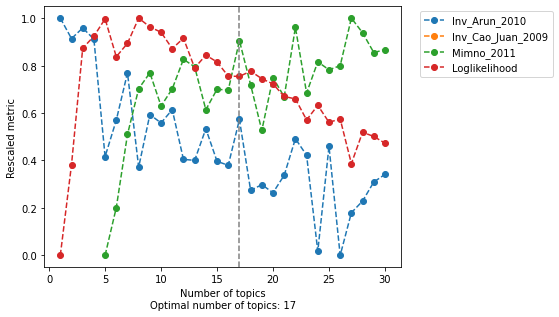

<Figure size 432x288 with 0 Axes>

In [84]:
write = True
for sample in optimal_topics_dict.keys():
    cto_path = cto_singlets_path_dict[sample]
    print(sample)
    ntopics = optimal_topics_dict[sample]
    cto_path_new = cto_path.replace('.pkl', f'.model_{ntopics}topics.pkl')
    print(cto_path_new)
    if not os.path.isfile(cto_path_new):
        if(sample in list(models_path_dict.keys())):
            models_path = models_path_dict[sample]
            with open(models_path, 'rb') as f:
                models = pickle.load(f)

            print(f"\tLoaded {models_path}, evaluating...")
            model = evaluate_models(models,
                         select_model=optimal_topics_dict[sample], 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot=True, # disabled since we only test one model here
                         plot_metrics=False
                         )
            
            plt.savefig(f"plots_qc/{sample}__model_evaluation.png", facecolor='white')
            
            if write == True:
                with open(cto_path, 'rb') as f:
                    cto = pickle.load(f)

                cto.add_LDA_model(model)

                with open(cto_path_new, "wb") as f:
                    pickle.dump(cto, f, protocol=4)

        else:
            print(f"\t{sample} models does not exist!")
    else:
        print(f"\t{cto_path_new} already exists! Skipping...")
        

In [83]:
models_path

'models__screen__mallet/UCS_ddseq_2.FULL__models_400_iter.pkl'